In [72]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas

In [73]:
# Load .env environment variables
load_dotenv()

True

In [74]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [75]:
# Create the Alpaca API object
exchanges = 'FTXU'
url = 'https://data.alpaca.markets/v1beta1/crypto'

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = url
    )

In [76]:
# Data start date
start =  pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()


In [77]:
#created crypto portfolio using ten tokens
crypto_performers=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD']


In [78]:
# Set timeframe
timeframe = '1Day'

In [79]:
#create initial dataframe from the Alpaca API
crypto_portfolio_df = alpaca.get_crypto_bars(
    symbol = crypto_performers,
    exchanges = exchanges,
    timeframe = timeframe,
    start = start
).df

display(crypto_portfolio_df.head())

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2021-01-01 06:00:00+00:00,FTXU,29225.0,29631.0,28750.0,29631.0,25.0765,211,29330.826766,BTCUSD
2021-01-02 06:00:00+00:00,FTXU,29585.0,34172.5,29566.5,33666.5,237.1624,1742,32113.173543,BTCUSD
2021-01-03 06:00:00+00:00,FTXU,33791.5,34820.5,32335.0,32919.0,291.5192,2155,33900.455198,BTCUSD
2021-01-04 06:00:00+00:00,FTXU,33013.0,33448.5,27794.0,30464.5,642.7430,2501,30211.437917,BTCUSD
2021-01-05 06:00:00+00:00,FTXU,30493.0,35878.5,29900.0,34863.0,999.8224,1378,32039.850844,BTCUSD


In [80]:
# Drop the following columns 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'
columns=['exchange','open', 'high', 'low', 'volume', 'trade_count', 'vwap']
crypto_api_df = crypto_portfolio_df.drop(columns, axis = 1)
crypto_api_df.head()

,close,symbol
timestamp,,
2021-01-01 06:00:00+00:00,29631.0,BTCUSD
2021-01-02 06:00:00+00:00,33666.5,BTCUSD
2021-01-03 06:00:00+00:00,32919.0,BTCUSD
2021-01-04 06:00:00+00:00,30464.5,BTCUSD
2021-01-05 06:00:00+00:00,34863.0,BTCUSD


In [81]:
#found data in the portfolio from June 1, 2021
crypto_performers_start_df = crypto_api_df.loc['2021-06-01']
crypto_performers_start_df.reset_index(inplace=True)

display(crypto_performers_start_df)

,timestamp,close,symbol
0,2021-06-01 05:00:00+00:00,36702.00000,BTCUSD
1,2021-06-01 05:00:00+00:00,0.37085,DOGEUSD
2,2021-06-01 05:00:00+00:00,2626.50000,ETHUSD
3,2021-06-01 05:00:00+00:00,0.75915,GRTUSD
4,2021-06-01 05:00:00+00:00,30.48400,LINKUSD
5,2021-06-01 05:00:00+00:00,182.65500,LTCUSD
6,2021-06-01 05:00:00+00:00,31.05500,SOLUSD
7,2021-06-01 05:00:00+00:00,11.99290,SUSHIUSD
8,2021-06-01 05:00:00+00:00,0.07652,TRXUSD
9,2021-06-01 05:00:00+00:00,27.29400,UNIUSD


In [82]:
#plot
crypto_pivot_start= crypto_performers_start_df.pivot_table(values="close", index="timestamp", columns="symbol")
crypto_plot_start = crypto_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title= 'Crypto Closing Values on 6/1/2021',
    rot=90
)
crypto_plot_start

:Bars   [timestamp,symbol]   (value)

In [83]:
#find how crypto portfolio did at the of the year
crypto_performers_end_df = crypto_api_df.loc['2021-12-31']
crypto_performers_end_df.reset_index(inplace=True)
crypto_performers_end_df

,timestamp,close,symbol
0,2021-12-31 06:00:00+00:00,47185.000000,BTCUSD
1,2021-12-31 06:00:00+00:00,0.171764,DOGEUSD
2,2021-12-31 06:00:00+00:00,3729.100000,ETHUSD
3,2021-12-31 06:00:00+00:00,0.648700,GRTUSD
4,2021-12-31 06:00:00+00:00,19.833500,LINKUSD
5,2021-12-31 06:00:00+00:00,148.035000,LTCUSD
6,2021-12-31 06:00:00+00:00,173.175000,SOLUSD
7,2021-12-31 06:00:00+00:00,9.413800,SUSHIUSD
8,2021-12-31 06:00:00+00:00,0.076073,TRXUSD
9,2021-12-31 06:00:00+00:00,17.298000,UNIUSD


In [84]:
#plot
crypto_pivot_end= crypto_performers_end_df.pivot_table(values="close", index="timestamp", columns="symbol")
crypto_plot_end = crypto_pivot_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Crypto Closing Values on 12/31/2021',
    rot=90 
)
crypto_plot_end

:Bars   [timestamp,symbol]   (value)

In [85]:
crypto_plot_start*crypto_plot_end

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [86]:
# create df containing info from '2021-06-01' through '2021-03-31'
crypto_timeframe = crypto_api_df.loc['2021-06-01':'2021-12-31']
crypto_timeframe.reset_index(inplace=True)

crypto_timeframe.head()


C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,timestamp,close,symbol
0,2021-06-01 05:00:00+00:00,36702.0,BTCUSD
1,2021-06-02 05:00:00+00:00,37950.0,BTCUSD
2,2021-06-03 05:00:00+00:00,37621.0,BTCUSD
3,2021-06-04 05:00:00+00:00,37661.0,BTCUSD
4,2021-06-05 05:00:00+00:00,35995.0,BTCUSD


In [87]:
# create a pivot table to plot the close over time
crypto_timeframe = crypto_timeframe.pivot_table(values="close", index="timestamp", columns="symbol")

crypto_timeframe.hvplot(
    xlabel='DATE',
    ylabel='Closing Price',
    title='Closing Prices Crypto Portfolio 6/1/2021 - 12/31/2021',
    figsize=[20,10]
)


:NdOverlay   [symbol]
   :Curve   [timestamp]   (value)

In [88]:
#create columns for shares and calculate value on 6/1/2021
initial_investment = 10000

crypto_performers_start_df['shares']=(0.10*initial_investment)
crypto_performers_start_df['shares']=(0.10*initial_investment/crypto_performers_start_df['close'])

crypto_performers_start_df['values']=crypto_performers_start_df['shares'] * crypto_performers_start_df['close']

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [89]:
#display df
crypto_performers_start_df

,timestamp,close,symbol,shares,values
0,2021-06-01 05:00:00+00:00,36702.00000,BTCUSD,0.027246,1000.0
1,2021-06-01 05:00:00+00:00,0.37085,DOGEUSD,2696.508022,1000.0
2,2021-06-01 05:00:00+00:00,2626.50000,ETHUSD,0.380735,1000.0
3,2021-06-01 05:00:00+00:00,0.75915,GRTUSD,1317.262728,1000.0
4,2021-06-01 05:00:00+00:00,30.48400,LINKUSD,32.804094,1000.0
5,2021-06-01 05:00:00+00:00,182.65500,LTCUSD,5.474802,1000.0
6,2021-06-01 05:00:00+00:00,31.05500,SOLUSD,32.200934,1000.0
7,2021-06-01 05:00:00+00:00,11.99290,SUSHIUSD,83.382668,1000.0
8,2021-06-01 05:00:00+00:00,0.07652,TRXUSD,13068.478829,1000.0
9,2021-06-01 05:00:00+00:00,27.29400,UNIUSD,36.638089,1000.0


In [90]:
#display sum of value of crypto portfolio on June 1, 2021 
sum_crypto_portfolio_start = crypto_performers_start_df['values'].sum()

print(f'The total value of the crypto portfolio on June 1, 2021 was {sum_crypto_portfolio_start}')

The total value of the crypto portfolio on June 1, 2021 was 10000.0


In [91]:
#setup df to plot value and symbol
columns=['close','shares']
crypto_values_start = crypto_performers_start_df.drop(columns,axis=1)
crypto_values_start = crypto_values_start.pivot_table(values="values", index="timestamp", columns="symbol")

In [92]:
#display df
crypto_values_start

symbol,BTCUSD,DOGEUSD,ETHUSD,GRTUSD,LINKUSD,LTCUSD,SOLUSD,SUSHIUSD,TRXUSD,UNIUSD
timestamp,,,,,,,,,,
2021-06-01 05:00:00+00:00,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [93]:
#plot
crypto_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Crypto Portfolio on 6/1/2021'
)

:Bars   [timestamp,symbol]   (value)

In [94]:
#create columns for shares and calculate value on 12/31/2021
crypto_performers_end_df['shares'] = crypto_performers_start_df['shares']
crypto_performers_end_df['values']=crypto_performers_end_df['shares'] * crypto_performers_end_df['close']

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
#display df
crypto_performers_end_df

,timestamp,close,symbol,shares,values
0,2021-12-31 06:00:00+00:00,47185.000000,BTCUSD,0.027246,1285.624762
1,2021-12-31 06:00:00+00:00,0.171764,DOGEUSD,2696.508022,463.164352
2,2021-12-31 06:00:00+00:00,3729.100000,ETHUSD,0.380735,1419.798211
3,2021-12-31 06:00:00+00:00,0.648700,GRTUSD,1317.262728,854.508332
4,2021-12-31 06:00:00+00:00,19.833500,LINKUSD,32.804094,650.619997
5,2021-12-31 06:00:00+00:00,148.035000,LTCUSD,5.474802,810.462347
6,2021-12-31 06:00:00+00:00,173.175000,SOLUSD,32.200934,5576.396716
7,2021-12-31 06:00:00+00:00,9.413800,SUSHIUSD,83.382668,784.947761
8,2021-12-31 06:00:00+00:00,0.076073,TRXUSD,13068.478829,994.151856
9,2021-12-31 06:00:00+00:00,17.298000,UNIUSD,36.638089,633.765663


In [96]:
#display sum of value of crypto portfolio on December 31, 2021 
sum_crypto_portfolio_end= crypto_performers_end_df['values'].sum()

print(f'The total value of the crypto portfolio on December 31, 2021 was {sum_crypto_portfolio_end}')

The total value of the crypto portfolio on December 31, 2021 was 13473.439995184039


In [97]:
#setup df to plot value and symbol
columns=['close','shares']
crypto_values_end = crypto_performers_end_df.drop(columns,axis=1)
crypto_values_end = crypto_values_end.pivot_table(values="values", index="timestamp", columns="symbol")

In [98]:
#display values df
crypto_values_end

symbol,BTCUSD,DOGEUSD,ETHUSD,GRTUSD,LINKUSD,LTCUSD,SOLUSD,SUSHIUSD,TRXUSD,UNIUSD
timestamp,,,,,,,,,,
2021-12-31 06:00:00+00:00,1285.624762,463.164352,1419.798211,854.508332,650.619997,810.462347,5576.396716,784.947761,994.151856,633.765663


In [99]:
#plot crypto portfolio value on 12/31/2021
crypto_values_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Crypto Portfolio on 12/31/2021'
)
    

:Bars   [timestamp,symbol]   (value)

In [100]:
crypto_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    rot=90,
    title='Crypto Portfolio'
)*crypto_values_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [101]:
#find change in crypto portfolio after six months

crypto_portfolio_total =sum_crypto_portfolio_end-sum_crypto_portfolio_start

print(f'The total of the crypto portfolio after six months = {crypto_portfolio_total}')

The total of the crypto portfolio after six months = 3473.4399951840387


In [102]:
#create a df to calculate daily change
#'BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'
BTCUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='BTCUSD'].drop('symbol', axis=1)
ETHUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='ETHUSD'].drop('symbol', axis=1)
LTCUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='LTCUSD'].drop('symbol', axis=1)
DOGEUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='DOGEUSD'].drop('symbol', axis=1)
GRTUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='GRTUSD'].drop('symbol', axis=1)
SOLUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='SOLUSD'].drop('symbol', axis=1)
SUSHIUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='SUSHIUSD'].drop('symbol', axis=1)
UNIUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='UNIUSD'].drop('symbol', axis=1)
TRXUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='TRXUSD'].drop('symbol', axis=1)
LINKUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='LINKUSD'].drop('symbol', axis=1)


In [103]:

df_crypto_portfolio = pd.concat([BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD], axis=1, keys=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'])
df_crypto_portfolio.head()

BTCUSD                                      \
                          exchange     open     high      low    close   
timestamp                                                                
2021-01-01 06:00:00+00:00     FTXU  29225.0  29631.0  28750.0  29631.0   
2021-01-02 06:00:00+00:00     FTXU  29585.0  34172.5  29566.5  33666.5   
2021-01-03 06:00:00+00:00     FTXU  33791.5  34820.5  32335.0  32919.0   
2021-01-04 06:00:00+00:00     FTXU  33013.0  33448.5  27794.0  30464.5   
2021-01-05 06:00:00+00:00     FTXU  30493.0  35878.5  29900.0  34863.0   

                                                                ETHUSD  \
                             volume trade_count          vwap exchange   
timestamp                                                                
2021-01-01 06:00:00+00:00   25.0765         211  29330.826766     FTXU   
2021-01-02 06:00:00+00:00  237.1624        1742  32113.173543     FTXU   
2021-01-03 06:00:00+00:00  291.5192        2155  33900.455198     FTXU   
2021-01-04 06:00:00+00:00  642.7430        2501  30211.437917     FTXU   
2021-01-05 06:00:00+00:00  999.8224        1378  32039.850844     FTXU   

                                    ...      TRXUSD       LINKUSD           \
                              open  ... trade_count vwap exchange     open   
timestamp                           ...                                      
2021-01-01 06:00:00+00:00   739.08  ...         NaN  NaN     FTXU  11.9900   
2021-01-02 06:00:00+00:00   736.30  ...         NaN  NaN     FTXU  11.6050   
2021-01-03 06:00:00+00:00   787.43  ...         NaN  NaN     FTXU  12.8565   
2021-01-04 06:00:00+00:00  1093.38  ...         NaN  NaN     FTXU  14.9810   
2021-01-05 06:00:00+00:00  1002.08  ...         NaN  NaN      NaN      NaN   

                                                                         \
                              high      low    close volume trade_count   
timestamp                                                                 
2021-01-01 06:00:00+00:00  11.9900  11.9480  11.9480    5.0         2.0   
2021-01-02 06:00:00+00:00  12.1095  11.6050  12.1095   20.7         2.0   
2021-01-03 06:00:00+00:00  13.1335  12.8565  13.1335   25.7         2.0   
2021-01-04 06:00:00+00:00  14.9810  12.9665  12.9665  124.6         3.0   
2021-01-05 06:00:00+00:00      NaN      NaN      NaN    NaN         NaN   

                                      
                                vwap  
timestamp                             
2021-01-01 06:00:00+00:00  11.981600  
2021-01-02 06:00:00+00:00  12.107063  
2021-01-03 06:00:00+00:00  12.912547  
2021-01-04 06:00:00+00:00  13.850893  
2021-01-05 06:00:00+00:00        NaN  

[5 rows x 80 columns]

In [104]:
#create df to find daily returns
df_crypto_portfolio = df_crypto_portfolio.loc['2021-06-01':'2021-12-31']

df_crypto_portfolio.head()

BTCUSD                                      \
                          exchange     open     high      low    close   
timestamp                                                                
2021-06-01 05:00:00+00:00     FTXU  36740.0  37444.0  35536.0  36702.0   
2021-06-02 05:00:00+00:00     FTXU  36690.0  38217.0  36622.0  37950.0   
2021-06-03 05:00:00+00:00     FTXU  38032.0  39478.0  37387.0  37621.0   
2021-06-04 05:00:00+00:00     FTXU  37500.0  37844.0  35600.0  37661.0   
2021-06-05 05:00:00+00:00     FTXU  37690.0  37924.0  34761.0  35995.0   

                                                                ETHUSD  \
                             volume trade_count          vwap exchange   
timestamp                                                                
2021-06-01 05:00:00+00:00  860.6465        3411  36366.537984     FTXU   
2021-06-02 05:00:00+00:00  304.0149        1548  37505.478819     FTXU   
2021-06-03 05:00:00+00:00  250.1933        1345  38496.511503     FTXU   
2021-06-04 05:00:00+00:00  363.3660        2530  36726.258032     FTXU   
2021-06-05 05:00:00+00:00  402.9814        2714  36121.088683     FTXU   

                                   ...      TRXUSD            LINKUSD          \
                             open  ... trade_count      vwap exchange    open   
timestamp                          ...                                          
2021-06-01 05:00:00+00:00  2636.8  ...        62.0  0.075110     FTXU  30.574   
2021-06-02 05:00:00+00:00  2635.3  ...       157.0  0.077496     FTXU  30.593   
2021-06-03 05:00:00+00:00  2769.6  ...       216.0  0.079805     FTXU  31.210   
2021-06-04 05:00:00+00:00  2735.0  ...       104.0  0.076355     FTXU  29.795   
2021-06-05 05:00:00+00:00  2789.7  ...        84.0  0.076750     FTXU  29.516   

                                                                            \
                              high      low    close    volume trade_count   
timestamp                                                                    
2021-06-01 05:00:00+00:00  31.6655  28.8070  30.4840  115327.0      3121.0   
2021-06-02 05:00:00+00:00  32.1890  30.0340  31.1210   82766.1      5975.0   
2021-06-03 05:00:00+00:00  32.8410  27.1950  29.6755  110630.1      7912.0   
2021-06-04 05:00:00+00:00  29.8635  27.1705  29.5445   90755.6      6456.0   
2021-06-05 05:00:00+00:00  30.1550  26.0745  27.6400  112948.2      8477.0   

                                      
                                vwap  
timestamp                             
2021-06-01 05:00:00+00:00  30.191905  
2021-06-02 05:00:00+00:00  30.846957  
2021-06-03 05:00:00+00:00  31.580947  
2021-06-04 05:00:00+00:00  28.811946  
2021-06-05 05:00:00+00:00  27.499658  

[5 rows x 80 columns]

In [105]:
#create empty df for closing prices
df_closing_prices_crypto = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in crypto_performers:
    df_closing_prices_crypto[ticker] = df_crypto_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices_crypto.index = df_closing_prices_crypto.index.date

#display df
df_closing_prices_crypto.head()



,BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD
2021-06-01,36702.0,2626.5,182.655,0.370850,0.75915,31.0550,11.9929,27.294,0.076520,30.4840
2021-06-02,37950.0,2766.9,189.125,0.427976,0.78635,35.3450,12.9986,28.130,0.078897,31.1210
2021-06-03,37621.0,2727.7,182.230,0.385888,0.84555,37.8800,12.4467,27.000,0.079235,29.6755
2021-06-04,37661.0,2787.9,182.925,0.384303,0.83490,41.9625,12.5337,27.379,0.078750,29.5445
2021-06-05,35995.0,2682.0,177.320,0.374430,0.77375,39.9200,11.7012,25.912,0.076522,27.6400


In [106]:
# Compute daily returns
df_daily_returns_crypto = df_closing_prices_crypto.pct_change().dropna()

# Display sample data
df_daily_returns_crypto.head()

,BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD
2021-06-02,0.034004,0.053455,0.035422,0.154041,0.035830,0.138142,0.083858,0.030629,0.031070,0.020896
2021-06-03,-0.008669,-0.014167,-0.036457,-0.098342,0.075285,0.071722,-0.042458,-0.040171,0.004278,-0.046448
2021-06-04,0.001063,0.022070,0.003814,-0.004107,-0.012595,0.107775,0.006990,0.014037,-0.006121,-0.004414
2021-06-05,-0.044237,-0.037986,-0.030641,-0.025691,-0.073242,-0.048674,-0.066421,-0.053581,-0.028286,-0.064462
2021-06-06,0.008529,0.031916,0.013366,-0.002357,0.046850,0.068512,-0.011802,0.016981,0.022902,0.018705


In [107]:
#plot daily return of crypto portfolio
df_daily_returns_crypto.hvplot(
    xlabel='DATE',
    ylabel='Daily Return',
    title='The Daily Returns of Crypto Portfolio 6/1/2021 - 12/31/2021',
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

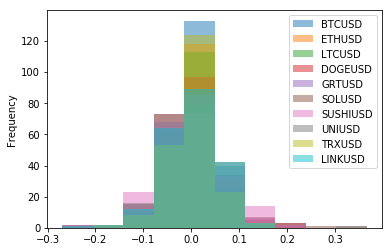

In [108]:
# Visualize the distribution of daily returns across all cryptos using a histogram plot
df_daily_returns_crypto.plot.hist(alpha=0.5)

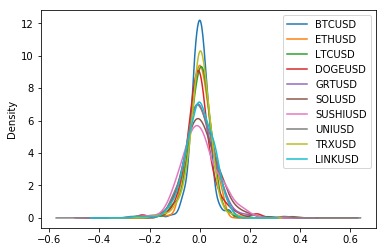

In [109]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns_crypto.plot.density()

In [110]:
#removing column exchanges 
#df_crypto_portfolio = df_crypto_portfolio.drop(columns='exchange')


In [121]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation

In [127]:
columns='open','high','low','close'
df1 = pd.DataFrame(np.random.random((4, 4)), columns=list('openhighlowclose'))
df2 = pd.DataFrame(np.random.random((4, 3)), columns=list('BDF'), index=[2, 3, 6, 7])

df = pd.concat([df1, df2], keys=['X', 'Y'], axis=1)

ValueError: Shape of passed values is (4, 4), indices imply (4, 16)

In [115]:
df1

,A,B,C,D
0,0.527719,0.161390,0.678361,0.489384
1,0.930368,0.548722,0.349892,0.078989
2,0.847077,0.826245,0.145463,0.043236
3,0.416467,0.116847,0.289158,0.730879


In [114]:
df2

,B,D,F
2,0.018980,0.407749,0.357360
3,0.113538,0.986027,0.732146
6,0.333566,0.623194,0.178008
7,0.672049,0.564896,0.671675


In [ ]:


crypto_df = pd.concat([BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD]).drop(columns='exchange', axis=1) #keys=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'])

#crypto_df = crypto_df.drop(columns='exchange', axis = 1)
#crypto_df.rest_index()

#crypto_df = pd.concat(axis=1,keys=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'])

crypto_df.head()
#crypto_portfolio_df = crypto_portfolio_df.drop(columns='exchange', axis = 1)
#crypto_portfolio_df = pd.DataFrame(crypto_portfolio_df = axis=1, keys=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'])

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-01-01 06:00:00+00:00,29225.0,29631.0,28750.0,29631.0,25.0765,211,29330.826766
2021-01-02 06:00:00+00:00,29585.0,34172.5,29566.5,33666.5,237.1624,1742,32113.173543
2021-01-03 06:00:00+00:00,33791.5,34820.5,32335.0,32919.0,291.5192,2155,33900.455198
2021-01-04 06:00:00+00:00,33013.0,33448.5,27794.0,30464.5,642.7430,2501,30211.437917
2021-01-05 06:00:00+00:00,30493.0,35878.5,29900.0,34863.0,999.8224,1378,32039.850844


In [ ]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = crypto_portfolio_df,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


ValueError: Dot product shape mismatch, (1261, 10) vs (3,)